# 딥러닝 자연어 처리의 일반적인 과정
## 1. 토큰화

In [2]:
eng_sent = "the quick brown fox jumps over the lazy dog"

import spacy
spacy_en = spacy.load('en_core_web_sm')

def tokenize_en(text):
    return [token.text for token in spacy_en.tokenizer(text)]

print(tokenize_en(eng_sent))

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [3]:
from nltk.tokenize import word_tokenize

print(word_tokenize(eng_sent))

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [4]:
print(eng_sent.split())

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


### 한국어 형태소 분석: Mecab

In [1]:
import MeCab

m = MeCab.Tagger()
m.parse("안녕하세요. 테스트 입니다요.")

'안녕\tNNG,행위,T,안녕,*,*,*,*\n하\tXSV,*,F,하,*,*,*,*\n세요\tEP+EF,*,F,세요,Inflect,EP,EF,시/EP/*+어요/EF/*\n.\tSF,*,*,*,*,*,*,*\n테스트\tNNG,행위,F,테스트,*,*,*,*\n입니다요\tVCP+EF,*,F,입니다요,Inflect,VCP,EF,이/VCP/*+ᄇ니다요/EF/*\n.\tSF,*,*,*,*,*,*,*\nEOS\n'

In [2]:
print(m.parse("안녕하세요. 테스트 입니다요."))

안녕	NNG,행위,T,안녕,*,*,*,*
하	XSV,*,F,하,*,*,*,*
세요	EP+EF,*,F,세요,Inflect,EP,EF,시/EP/*+어요/EF/*
.	SF,*,*,*,*,*,*,*
테스트	NNG,행위,F,테스트,*,*,*,*
입니다요	VCP+EF,*,F,입니다요,Inflect,VCP,EF,이/VCP/*+ᄇ니다요/EF/*
.	SF,*,*,*,*,*,*,*
EOS



In [5]:
print(m.parse("안녕하세요."))

안녕	NNG,행위,T,안녕,*,*,*,*
하	XSV,*,F,하,*,*,*,*
세요	EP+EF,*,F,세요,Inflect,EP,EF,시/EP/*+어요/EF/*
.	SF,*,*,*,*,*,*,*
EOS



In [6]:
print(m.parse("안녕"))

안녕	IC,*,T,안녕,*,*,*,*
EOS



In [3]:
from konlpy.tag import Mecab

tokenizer = Mecab(dicpath=r'C:\mecab\mecab-ko-dic').morphs

print('mecab check : ', tokenizer("어릴 때 보고 지금 다시 봐도 재밌어요 ㅋㅋ"))

mecab check :  ['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ']


In [9]:
kor_sent = "오늘 날씨 좋다."

tokenizer = Mecab(dicpath=r'C:\mecab\mecab-ko-dic')

tokenized_sent = tokenizer.pos(kor_sent)
print(tokenized_sent)

# 영어로 된 품사 정보를 한글로 전환
print([(k, tokenizer.tagset.get(v)) for k,v in tokenized_sent] )

[('오늘', 'MAG'), ('날씨', 'NNG'), ('좋', 'VA'), ('다', 'EF'), ('.', 'SF')]
[('오늘', '일반 부사'), ('날씨', '일반 명사'), ('좋', '형용사'), ('다', '종결 어미'), ('.', '마침표, 물음표, 느낌표')]


In [10]:
tokenizer.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NNB': '의존 명사',
 'NNBC': '단위를 나타내는 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'SC': '구분자 , · / :',
 'SE': '줄임표 …',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SSC': '닫는 괄호 ), ]',
 'SSO': '여는 괄호 (, [',
 'SY': '기타 기호',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [25]:
len(tokenizer.tagset)

43

In [11]:
tokenizer.tagset['XR']

'어근'

In [12]:
tokenizer

In [13]:
tokenizer.morphs('안녕하세요')

['안녕', '하', '세요']

In [14]:
tokenizer.pos('안녕하세요')

[('안녕', 'NNG'), ('하', 'XSV'), ('세요', 'EP+EF')]

In [19]:
print(m.parse('안녕하세요'))

안녕	NNG,행위,T,안녕,*,*,*,*
하	XSV,*,F,하,*,*,*,*
세요	EP+EF,*,F,세요,Inflect,EP,EF,시/EP/*+어요/EF/*
EOS



In [20]:
m

<MeCab.Tagger; proxy of <Swig Object of type 'MeCab::Tagger *' at 0x000001B13BF87360> >

In [21]:
type(m)

MeCab.Tagger

In [22]:
MeCab

<module 'MeCab' from 'C:\\Users\\answl\\anaconda3\\envs\\nlp\\lib\\site-packages\\MeCab.py'>

## 2. 단어장 생성
### 2-1. 네이버 댓글 데이터 토큰화

In [33]:
from konlpy.tag import Mecab
import random

tokenizer = Mecab('C:/mecab/mecab-ko-dic')

data = []

with open('./data/nsmc/ratings.txt', encoding='utf8') as file:
    for In, line in enumerate(file):
        if In == 0: continue
        line = line.strip().split('\t')
        idx, sent, label = line
    
        data.append((tokenizer.morphs(sent), int(label)))

(['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], 1)


In [34]:
# 긍정 댓글 10개, 부정 댓글 10개 샘플링
sample_data = data[4:14] + data[-10:]
print(sample_data[0])

(['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], 1)


In [36]:
print(sample_data)

[(['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], 1), (['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], 1), (['완전', '감동', '입니다', '다시', '봐도', '감동'], 1), (['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'], 1), (['굿'], 1), (['바보', '가', '아니', '라', '병', '쉰', '인', '듯'], 1), (['내', '나이', '와', '같', '은', '영화', '를', '지금', '본', '나', '는', '감동', '적', '이', '다', '.', '.', '하지만', '훗날', '다시', '보면대', '사', '하나', '하나', '그', '감정', '을', '완벽', '하', '게', '이해', '할', '것', '만', '같', '다', '.', '..'], 1), (['재밌', '다'], 1), (['고질라', '니무', '귀엽', '다', '능', 'ㅋㅋ'], 1), (['영화', '의', '오페라', '화', '라고', '해야', '할', '작품', '.', '극단', '적', '평갈', '림', '은', '어쩔', '수', '없', '는', '듯', '.'], 1), (['장르', '는', '무협', '인데', '내', '가', '보', '기', '엔', '코믹', '이', '던데', '막장', '평점', '2', '점', '도', '아깝', '다'], 0), (['나치', '입장', '에서', '본', '영화', '가', '갑자기', '연속', '으로', '나오', '네', '?', '뭔일', '있', '었', '나', '.', '..'], 0), (['태권도', '?',

### 2-2. 단어장 생성

In [37]:
def build_vocab(data):
    
    # 문장의 각 형태소를 리스트로
    flatten = lambda d: [token for sent in d for token in sent]
    vocab = {}
    
    # unknown, pad 토큰 설정
    vocab['<unk>'] = 0
    vocab['<pad>'] = 1
    
    # 단어장 생성
    for token in flatten(list(zip(*data))[0]):
        if vocab.get(token) is None:
            vocab.setdefault(token, len(vocab))
    return vocab

vocab = build_vocab(sample_data)

일반적인 빈도수 세기 방법 
- if word not in dict: dict[]=0 ~~ 
- 코드 가독성 측면에서 안 좋음.

<더 나은 방법>
--> dict.setdefault
- for 문 돌아갈때마다 setdefault(word, 0) 이런식으로 해줘야함.

<더 나은 방법>
--> from collections import defaultdict
- counter = defaultdict(int)
- 하고 그냥 counter[word]) += 1 for word in morphs 해주면 됨.

In [38]:
vocab

{'<unk>': 0,
 '<pad>': 1,
 '안개': 2,
 '자욱': 3,
 '한': 4,
 '밤하늘': 5,
 '에': 6,
 '떠': 7,
 '있': 8,
 '는': 9,
 '초승달': 10,
 '같': 11,
 '은': 12,
 '영화': 13,
 '.': 14,
 '사랑': 15,
 '을': 16,
 '해': 17,
 '본': 18,
 '사람': 19,
 '이': 20,
 '라면': 21,
 '처음': 22,
 '부터': 23,
 '끝': 24,
 '까지': 25,
 '웃': 26,
 '수': 27,
 '완전': 28,
 '감동': 29,
 '입니다': 30,
 '다시': 31,
 '봐도': 32,
 '개': 33,
 '들': 34,
 '의': 35,
 '전쟁': 36,
 '2': 37,
 '나오': 38,
 '나요': 39,
 '?': 40,
 '면': 41,
 '1': 42,
 '빠': 43,
 '로': 44,
 '보': 45,
 '고': 46,
 '싶': 47,
 '음': 48,
 '굿': 49,
 '바보': 50,
 '가': 51,
 '아니': 52,
 '라': 53,
 '병': 54,
 '쉰': 55,
 '인': 56,
 '듯': 57,
 '내': 58,
 '나이': 59,
 '와': 60,
 '를': 61,
 '지금': 62,
 '나': 63,
 '적': 64,
 '다': 65,
 '하지만': 66,
 '훗날': 67,
 '보면대': 68,
 '사': 69,
 '하나': 70,
 '그': 71,
 '감정': 72,
 '완벽': 73,
 '하': 74,
 '게': 75,
 '이해': 76,
 '할': 77,
 '것': 78,
 '만': 79,
 '..': 80,
 '재밌': 81,
 '고질라': 82,
 '니무': 83,
 '귀엽': 84,
 '능': 85,
 'ㅋㅋ': 86,
 '오페라': 87,
 '화': 88,
 '라고': 89,
 '해야': 90,
 '작품': 91,
 '극단': 92,
 '평갈': 93,
 '림': 94,
 '어

In [39]:
len(vocab)

157

## 3. 수치화

In [40]:
def numericalize(sent, vocab):
    temp = [] # 문장의 토큰(형태소) 정수를 담을 리스트
    for token in sent:
        # 해당 토큰(형태소)이 이미 만든 사전에 없다면
        if vocab.get(token) is None:
            temp.append(vocab['<unk>']) # 0
        else:
            temp.append(vocab.get(token))
    return temp

In [41]:
numerical_data = [(numericalize(sent, vocab), label)
                 for sent, label in sample_data]

print(numerical_data[0])

([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 1)


In [42]:
print(numerical_data[-1])

([150, 151, 152, 51, 153, 154, 155, 156], 0)


In [43]:
len(numerical_data)

20

### Bag of Words

In [45]:
import torch
from collections import Counter

num_docs = len(numerical_data) # 20
num_vocab = len(vocab) # 157
term_matrix = torch.zeros(num_docs, num_vocab)

for i, (sent, label) in enumerate(numerical_data):
    tokens, cnts = zip(*list(Counter(sent).items()))
    term_matrix[i, torch.LongTensor(tokens)] = torch.FloatTensor(cnts)
    
print(term_matrix.shape)
print(term_matrix.eq(0).sum())

torch.Size([20, 157])
tensor(2917)


In [57]:
term_matrix

tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 1., 1.]])

### Heap's Law 
- 문장이 많아질수록 사용되는 고유 단어 개수는 로그함수적으로 증가한다

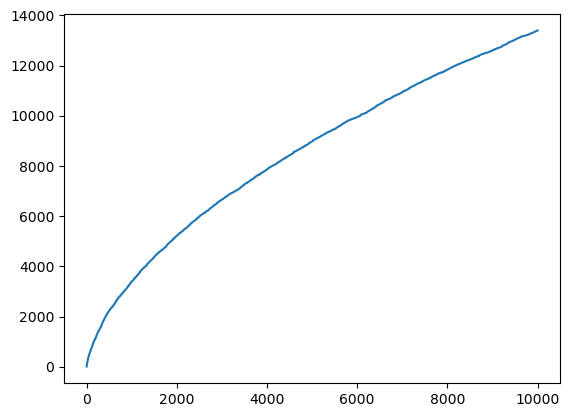

In [85]:
# 주피터노트북 창 내부에 그림 출력
%matplotlib inline

import matplotlib.pyplot as plt

global_unique = []
global_unique_cnt = []

for sent in data[:10000]:
    unique = set(sent[0]) # 문장의 형태소 리스트
    global_unique += list(unique)
    
    # 문장들 전체로 봤을 때 중복되는 형태소를 또 거름
    global_unique = list(set(global_unique))
    
    # 문장이 하나하나 돌아가며 그때그때의 고유단어개수를 리스트 저장
    global_unique_cnt.append(len(global_unique))
    
fig, ax = plt.subplots(1,1)
ax.plot(list(range(10000)), global_unique_cnt)
plt.show()

## 4. 문장 패딩

In [86]:
print("Before Length of Sentences: ")
print([len(sent) for sent, _ in numerical_data])
# 각 문장의 형태소 개수들이 다 다름!

max_len = max([len(sent) for (sent,_) in numerical_data])
# 패딩 기준이 될 최대 형태소 개수를 저장 --> 38개

# 패딩과정
for sent, _ in numerical_data:
    if len(sent) < max_len:
        sent += [vocab['<pad>']] * (max_len - len(sent))
        # [1] * (38 - 지금 문장의 형태소 수)
        
print("After Length of Sentences: ")
print([len(sent) for sent,_ in numerical_data])
print(numerical_data[0]) # 첫 문장이 1로 패딩된 예시 보여줌

Before Length of Sentences: 
[13, 17, 6, 17, 1, 8, 38, 2, 6, 20, 19, 18, 3, 9, 11, 6, 5, 15, 15, 8]
After Length of Sentences: 
[38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 1)


# *TorchText 패키지
- 위 1-4 과정을 한번에 해결
- 다음 4개 과정 거쳐 손쉽게 데이터 처리

## 1) 필드 지정

In [9]:
from torchtext.legacy.data import Field
from konlpy.tag import Mecab

tokenizer = Mecab('C:/mecab/mecab-ko-dic')

TEXT = Field(sequential=True,
            use_vocab=True,
            tokenize=tokenizer.morphs,
            lower=True,
            batch_first=True)

LABEL = Field(sequential=True,
             use_vocab=False,
             preprocessing=lambda x:int(*x),
             batch_first=True,
             is_target=True)

ID = Field(sequential=False,
          use_vocab=False,
          is_target=False)

## 2) 데이터셋 만들기

In [10]:
from torchtext.legacy.data import TabularDataset

dataset = TabularDataset(path='./data/nsmc/ratings.txt',
                        format='tsv',
                        fields=[('id',ID),('text',TEXT),('label',LABEL)],
                        skip_header=True)

## 3) 단어장 생성

In [13]:
TEXT.build_vocab(dataset)

print('Total vocabulary: {}'.format(len(TEXT.vocab)))
print('Token for "<unk>": {}'.format(TEXT.vocab.stoi['<unk>']))
print('Token for "<pad>": {}'.format(TEXT.vocab.stoi['<pad>']))

Total vocabulary: 60825
Token for "<unk>": 0
Token for "<pad>": 1


## 4) 데이터 로더 설정

In [15]:
from torchtext.legacy.data import Iterator

device = 'cuda' if torch.cuda.is_available() else 'cpu'

data_loader = Iterator(dataset=dataset,
                      batch_size=3,
                      device=device)

for batch in data_loader:
    break
    
# 필드에서 정의한 이름으로 호출 가능
print(batch.text.size(), batch.label.size())
print(batch.text)

TypeError: object of type 'int' has no len()